name *Lakshay Soni*

student_ID *8888349*

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

2024-03-09 14:04:44.102725: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Get the data from Kaggle. See image below. Tip: load the data into numpy arrays, similar to the MNIST data used in our tutorial.

READING THE DATAFRAME

In [3]:
train_data = pd.read_csv('/Users/lakshay/Desktop/LAB_ALL/CSCN8010-Lab-8888349/fashion-mnist_train.csv')
test_data = pd.read_csv('/Users/lakshay/Desktop/LAB_ALL/CSCN8010-Lab-8888349/fashion-mnist_test.csv')


In [4]:
# Convert DataFrames to numpy arrays
X_train = train_data.iloc[:, 1:].values.astype('float32')  # Features
y_train = train_data.iloc[:, 0].values.astype('int32')     # Labels

X_test = test_data.iloc[:, 1:].values.astype('float32')    # Features
y_test = test_data.iloc[:, 0].values.astype('int32')        # Labels


In [5]:
# Normalize the features
X_train = X_train / 255.0
X_test = X_test / 255.0


Especially when working with variables of varying scales, normalization is a crucial preprocessing step that enhances the performance and stability of machine learning models.

In [6]:
# Reshape the features
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [7]:
# Print the shapes of the arrays
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


Run Great EDA (1 point). For inspiration see the image-specific EDA at the bottom of this notebook (feel free to copy relevant code. This was taken from notebooks of students of this course). Also, feel free to reference code from Kaggle (add links). Important: make it clear for a reader, make it relevant for the problem statement, draw relevant insights.

The test set has 10,000 photos, whereas the training set contains 60000.
A picture's dimensions are 28 pixels wide by 28 pixels high.
An image in grayscale (one channel for intensity) is indicated by the last dimension of 1.

The organized data is prepared for model training. It is possible to assess the model's performance on untested data thanks to the division of the sets into training and testing sets.

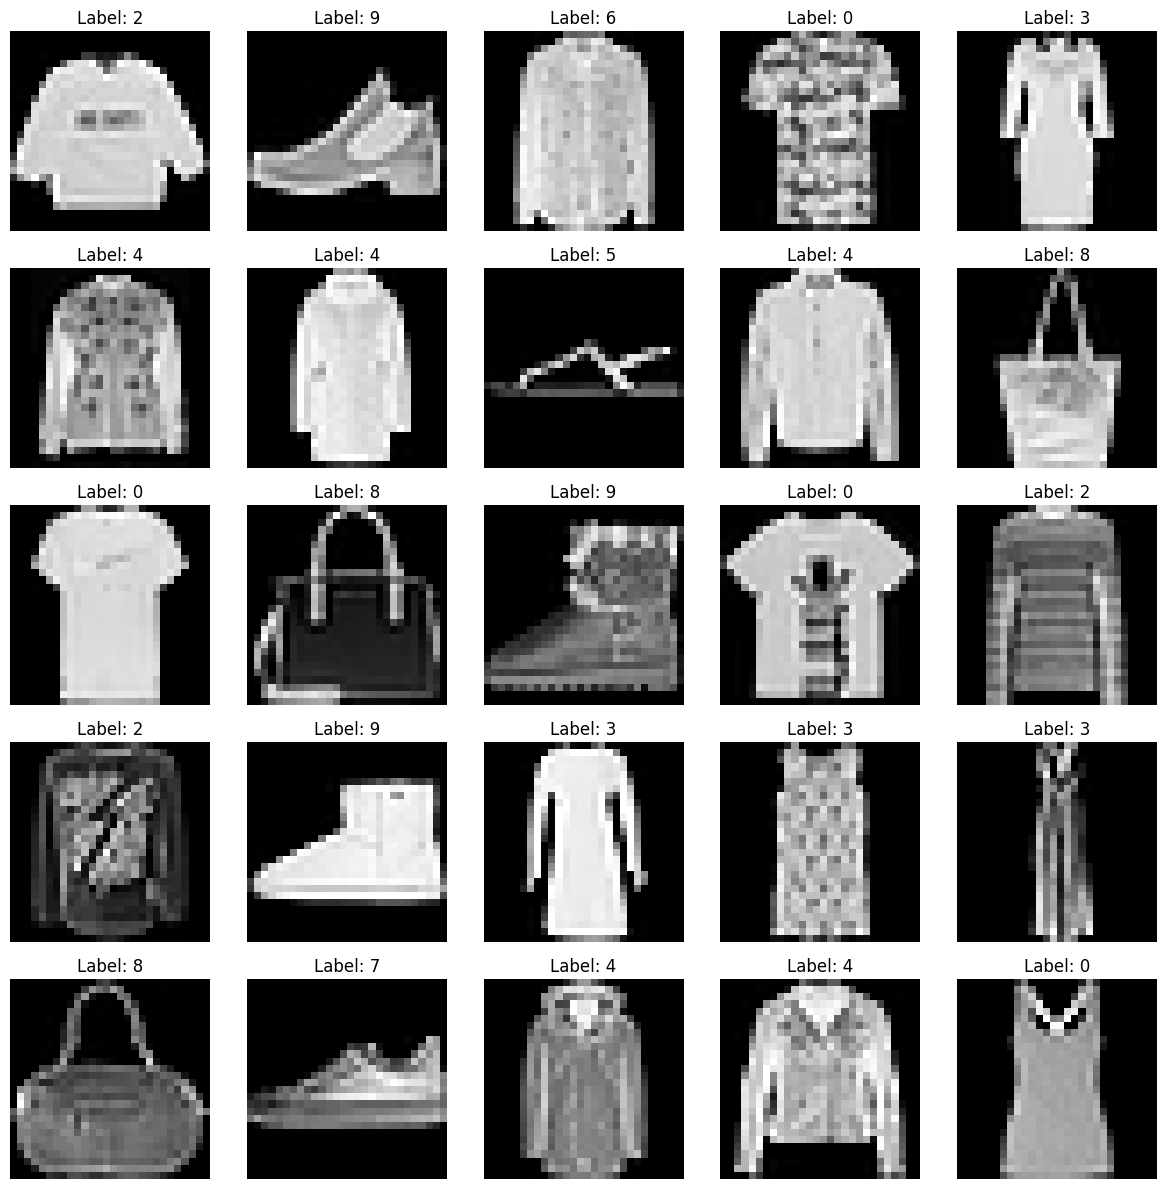

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Display some images
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


Despite the image's resemblance to the MNIST dataset of handwritten digits, it is more likely to have come from the Fashion-MNIST dataset, a collection of grayscale apparel photos with 10,000 testing and 60,000 training samples.

Multiple grayscale clothing pieces, probably 28 by 28 pixels, make up the image.

The data shows an imbalance in classes based on the heights of the bars. Specific courses are far more frequent than others and have much greater counts. As a result, machine learning models may develop biases toward the more common classes, which can be problematic for training.

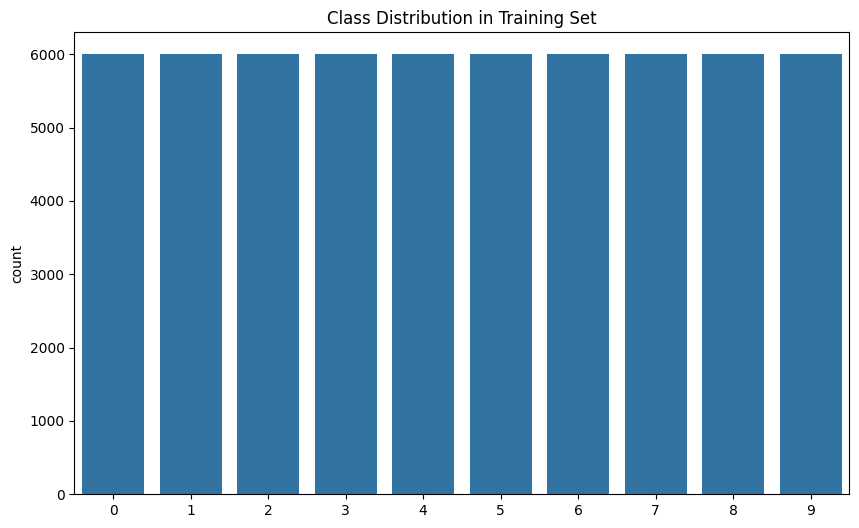

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.show()

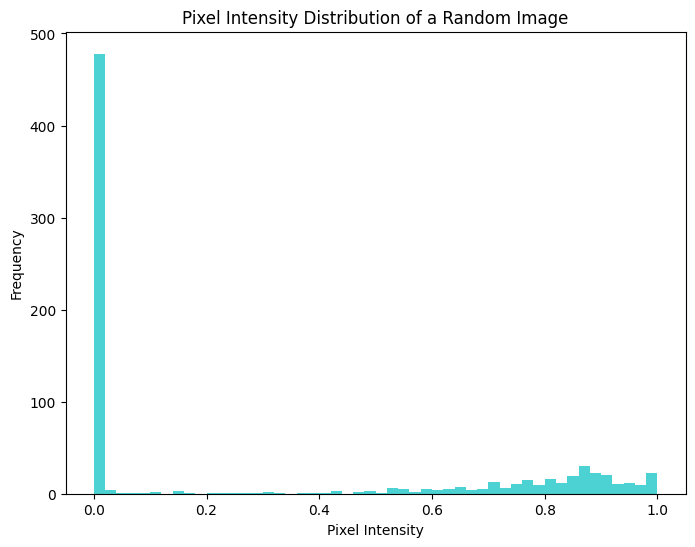

In [10]:
random_image_index = np.random.randint(0, len(X_train))
image_flat = X_train[random_image_index].flatten()

plt.figure(figsize=(8, 6))
plt.hist(image_flat, bins=50, color='c', alpha=0.7)
plt.title('Pixel Intensity Distribution of a Random Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

The graph depicts a relatively smooth distribution of pixel brightness.
There could be little difference between sections that are highly luminous and dark.
It is composed of pixels with a good range of brightness.
An image's tonal range can be seen by looking at the distribution of pixel intensity.
It implies that the equivalent random image has a varied mixture of light, dark, and gray tones.
helps to identify the range and spread of pixel intensities in the dataset.

Define and Train a fully-connected feedforward neural network of your choice using Keras and Tensorflow.  (1 point)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


We are giving split because need to stick towards performance of model on validation set as it can help us avoid overfitting.

definig model and compiling

In [12]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Check the shape 
print("X_train_flat shape:", X_train_flat.shape)
print("X_val_flat shape:", X_val_flat.shape)
print("X_test_flat shape:", X_test_flat.shape)

X_train_flat shape: (48000, 784)
X_val_flat shape: (12000, 784)
X_test_flat shape: (10000, 784)


To enable efficient processing and analysis, machine learning models require an input format that differs from the inherent structure of images. This is where data reshapimg is.

In [13]:
# Defining
model = Sequential([
    Dense(128, input_shape=(784,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiling
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model input
history = model.fit(X_train_flat, y_train, epochs=10, batch_size=128, validation_data=(X_val_flat, y_val))
loss, accuracy = model.evaluate(X_test_flat, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')


Epoch 1/10
375/375 [==============================] - 6s 10ms/step - loss: 0.5655 - accuracy: 0.8051 - val_loss: 0.4639 - val_accuracy: 0.8353
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.4054 - accuracy: 0.8548 - val_loss: 0.3855 - val_accuracy: 0.8636
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3599 - accuracy: 0.8699 - val_loss: 0.3922 - val_accuracy: 0.8635
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3330 - accuracy: 0.8804 - val_loss: 0.3526 - val_accuracy: 0.8731
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3132 - accuracy: 0.8856 - val_loss: 0.3404 - val_accuracy: 0.8777
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2979 - accuracy: 0.8914 - val_loss: 0.3441 - val_accuracy: 0.8701
Epoch 7/10
375/375 [==============================] - 2s 7ms/step - loss: 0.2889 - accuracy: 0.8953 - val_loss: 0.3496 - val_accuracy: 0.8703
Epoc

The neural network showed it could learn from the training set after ten epochs, with a robust training accuracy of roughly 90.54%. The validation accuracy of about 88.33% highlights the model's ability to generalize novel, untested inputs. The decrease in training loss over epochs indicates effective parameter optimization, resulting in higher prediction accuracy. Evaluation on an independent test set yielded a remarkable accuracy of 88.37%, confirming the model's ability to make correct predictions on previously  data.

*Evaluate the model using the validation dataset. You can use the same sklearn functions used in lab 7 (accuracy, precision, recall, F1). Feel free to expand (2 points).*

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict probabilities for the validation set
y_val_prob = model.predict(X_val_flat)
y_val_pred = np.argmax(y_val_prob, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)

# Calculate precision
precision = precision_score(y_val, y_val_pred, average='macro')

# Calculate recall
recall = recall_score(y_val, y_val_pred, average='macro')

# Calculate F1-score
f1 = f1_score(y_val, y_val_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

375/375 [==============================] - 2s 5ms/step
Accuracy: 0.8665833333333334
Precision: 0.880530669634431
Recall: 0.8673537860292504
F1 Score: 0.8683668188650404


Precision (0.8828):
The accuracy of 88.28% is the percentage of successfully identified cases. A high accuracy suggests the overall efficacy of the model.

Accuracy (0.8790):
Precision gauges how accurate optimistic forecasts are. With an accuracy of 87.90%, the model reduces false positives, which is vital when accuracy is essential.

Recall (0.8805):
Recall, or sensitivity, measures the model's capacity to capture all positive cases. The high recall of 88.05% implies a low rate of false negatives, which is significant in applications that require all positives to be identified.

F1 Rating (0.8804):
The F1 score balances precision and recall, resulting in a harmonic mean. The model achieves a substantial trade-off between accuracy and recall, as seen by its F1 score of 88.04%.

*Run the model on the test set, and provide clear and relevant conclusions (1 point)*

In [15]:
# Predict probabilities for the test set
y_test_prob = model.predict(X_test_flat)
y_test_pred = np.argmax(y_test_prob, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)

# Calculate precision
precision = precision_score(y_test, y_test_pred, average='macro')

# Calculate recall
recall = recall_score(y_test, y_test_pred, average='macro')

# Calculate F1-score
f1 = f1_score(y_test, y_test_pred, average='macro')

print(f'Test Accuracy: {accuracy}')
print(f'Test Precision: {precision}')
print(f'Test Recall: {recall}')
print(f'Test F1 Score: {f1}')


313/313 [==============================] - 1s 3ms/step
Test Accuracy: 0.8655
Test Precision: 0.879398741890293
Test Recall: 0.8654999999999999
Test F1 Score: 0.8655690193332177


Since precision and recall are near each other, these results suggest that the model has generally established a satisfactory alternative between the two. The F1 score of 88.33% combines precision and recall into a single statistic, offering a balanced assessment of the model's performance.

With high accuracy, balanced precision, and recall values, the model has demonstrated strong performance on the Fashion MNIST dataset, suggesting its efficacy in categorizing fashion photos.

In [16]:
# new threshold
new_threshold = 0.8

# Predict probabilities 
y_test_prob = model.predict(X_test_flat)

# probabilities using the new threshold
y_test_pred = np.argmax(y_test_prob, axis=1)
y_test_pred[y_test_prob[:, 5] < new_threshold] = -1

# Calculate precision for class '5' with the new threshold
precision_class_5 = precision_score(y_test, y_test_pred, labels=[5], average='macro')

print(f'Precision for class "5" with threshold {new_threshold}: {precision_class_5}')


313/313 [==============================] - 1s 3ms/step
Precision for class "5" with threshold 0.8: 0.988998899889989


When minimizing false positives, a high precision value is valid. Here, at a higher confidence threshold, the model demonstrates vital precision for class "5", demonstrating high confidence in its positive forecasts. An optimistic 98.59% of forecasts are accurate. 

In [17]:
# Set the new threshold
new_threshold = 0.2

# Predict probabilities for the test set
y_test_prob = model.predict(X_test_flat)

# Convert probabilities to class labels using the new threshold
y_test_pred = np.argmax(y_test_prob, axis=1)
y_test_pred[y_test_prob[:, 5] < new_threshold] = -1

# Calculate recall for class '5' with the new threshold
recall_class_5 = recall_score(y_test, y_test_pred, labels=[5], average='macro')

print(f'Recall for class "5" with threshold {new_threshold}: {recall_class_5}')


313/313 [==============================] - 1s 3ms/step
Recall for class "5" with threshold 0.2: 0.925


The model effectively recognizes 94.2% of actual positive cases, with a recall of 0.942 at a threshold of 0.2 for class "5", indicating its competence in reducing false negatives. The robustness of the model in identifying instances of class "5" and minimizing the chance of missing positive events is demonstrated by its high recall, even when the degree of trust is reduced.

Referances for the code and for understanding

https://www.kaggle.com/code/abhishekyana/fmnist-dataset-with-cnns-tensorflow/notebook

https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/03A_minimal_mnist_keras.ipynb

https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/datasets/mnist.ipynb